<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/School_Work_4_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sb


In [ ]:
dataset = pd.read_csv("/content/sample_data/BankNoteAuthenticity.csv")

In [ ]:
dataset

,VarianceOfWavelet,SkewnessOfWavelet,KurtosisOfWavelet,EntropyOfImage,Authenticity,Auth
0,3.62160,8.66610,-2.8073,-0.44699,0,Yes
1,4.54590,8.16740,-2.4586,-1.46210,0,Yes
2,3.86600,-2.63830,1.9242,0.10645,0,Yes
3,3.45660,9.52280,-4.0112,-3.59440,0,Yes
4,0.32924,-4.45520,4.5718,-0.98880,0,Yes
...,...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1,No
1368,-1.38870,-4.87730,6.4774,0.34179,1,No
1369,-3.75030,-13.45860,17.5932,-2.77710,1,No
1370,-3.56370,-8.38270,12.3930,-1.28230,1,No


In [ ]:
dataset['Auth1'] = dataset.loc[:,'Auth']

In [ ]:
dataset['Auth'] = dataset['Auth'].replace(('Yes','No'),(1,0))

<ipython-input-10-d3b737f29eb6>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Auth'] = dataset['Auth'].replace(('Yes','No'),(1,0))


In [ ]:
dataset

,VarianceOfWavelet,SkewnessOfWavelet,KurtosisOfWavelet,EntropyOfImage,Authenticity,Auth,Auth1
0,3.62160,8.66610,-2.8073,-0.44699,0,1,Yes
1,4.54590,8.16740,-2.4586,-1.46210,0,1,Yes
2,3.86600,-2.63830,1.9242,0.10645,0,1,Yes
3,3.45660,9.52280,-4.0112,-3.59440,0,1,Yes
4,0.32924,-4.45520,4.5718,-0.98880,0,1,Yes
...,...,...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1,0,No
1368,-1.38870,-4.87730,6.4774,0.34179,1,0,No
1369,-3.75030,-13.45860,17.5932,-2.77710,1,0,No
1370,-3.56370,-8.38270,12.3930,-1.28230,1,0,No


In [ ]:
X = dataset.iloc[:, :4]
Y = dataset.iloc[:, 5]

In [ ]:
X

,VarianceOfWavelet,SkewnessOfWavelet,KurtosisOfWavelet,EntropyOfImage
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [ ]:
Y

,Auth
0,1
1,1
2,1
3,1
4,1
...,...
1367,0
1368,0
1369,0
1370,0


In [ ]:
dataset.head()

,VarianceOfWavelet,SkewnessOfWavelet,KurtosisOfWavelet,EntropyOfImage,Authenticity,Auth,Auth1
0,3.62160,8.6661,-2.8073,-0.44699,0,1,Yes
1,4.54590,8.1674,-2.4586,-1.46210,0,1,Yes
2,3.86600,-2.6383,1.9242,0.10645,0,1,Yes
3,3.45660,9.5228,-4.0112,-3.59440,0,1,Yes
4,0.32924,-4.4552,4.5718,-0.98880,0,1,Yes


In [ ]:
df = pd.DataFrame(dataset)

In [ ]:
print(df)

      VarianceOfWavelet  SkewnessOfWavelet  KurtosisOfWavelet  EntropyOfImage  \
0               3.62160            8.66610            -2.8073        -0.44699   
1               4.54590            8.16740            -2.4586        -1.46210   
2               3.86600           -2.63830             1.9242         0.10645   
3               3.45660            9.52280            -4.0112        -3.59440   
4               0.32924           -4.45520             4.5718        -0.98880   
...                 ...                ...                ...             ...   
1367            0.40614            1.34920            -1.4501        -0.55949   
1368           -1.38870           -4.87730             6.4774         0.34179   
1369           -3.75030          -13.45860            17.5932        -2.77710   
1370           -3.56370           -8.38270            12.3930        -1.28230   
1371           -2.54190           -0.65804             2.6842         1.19520   

      Authenticity  Auth Au

In [ ]:
X = dataset.iloc[:, :4]
Y = dataset.iloc[:,5]
Y

,Auth
0,1
1,1
2,1
3,1
4,1
...,...
1367,0
1368,0
1369,0
1370,0


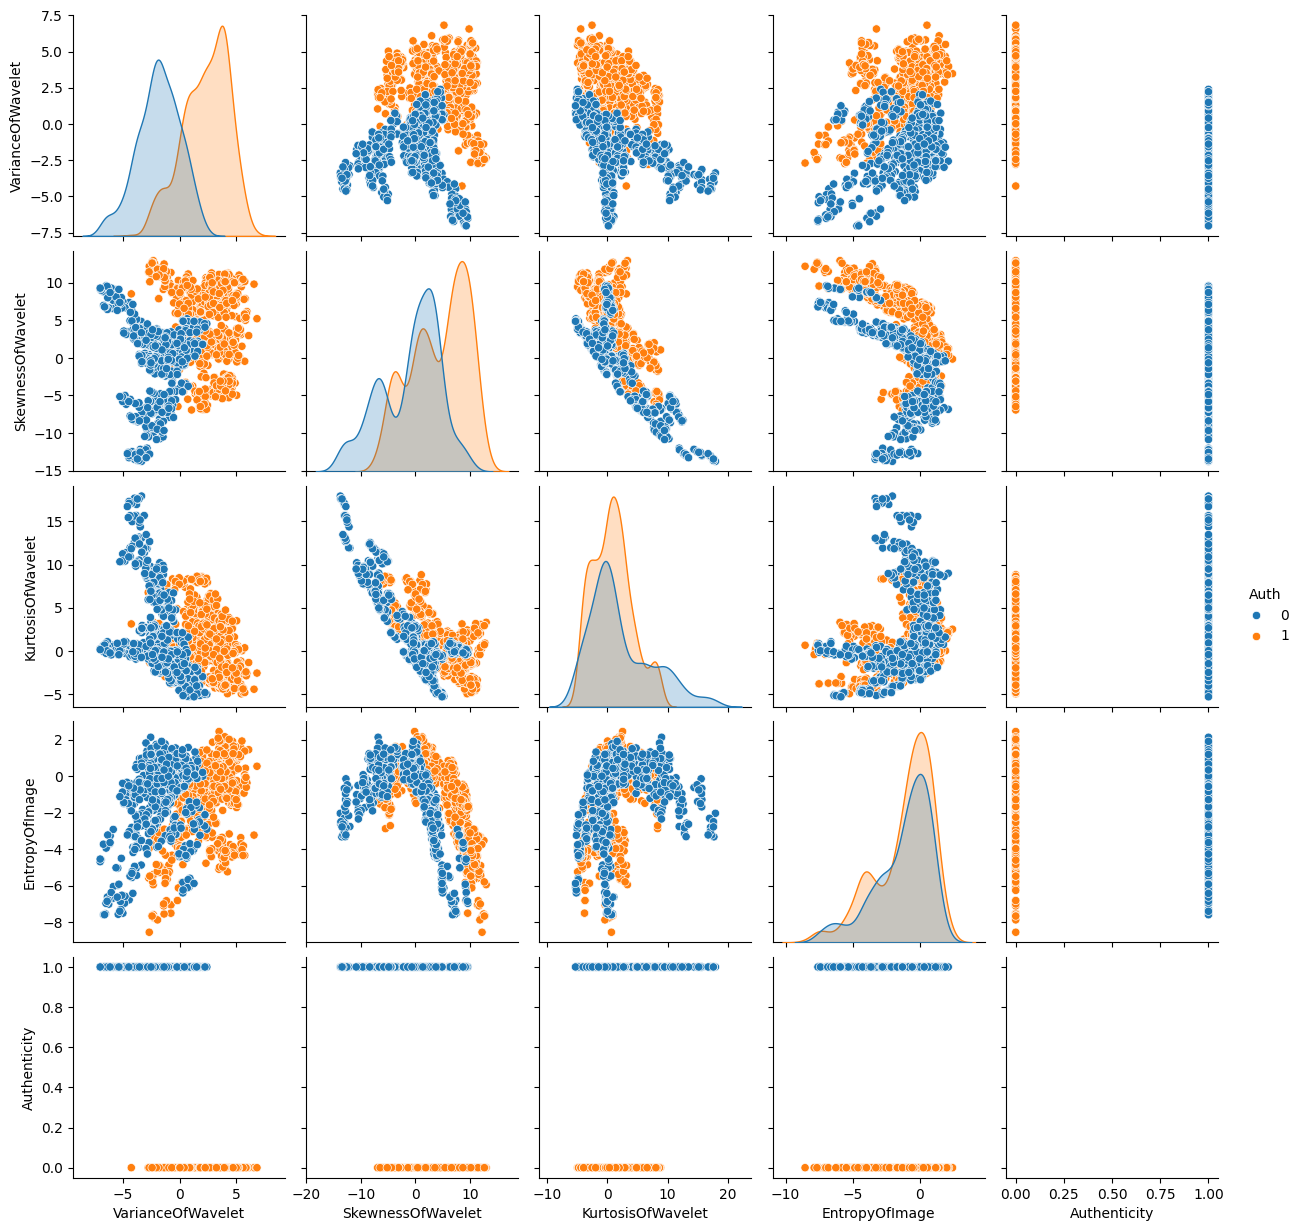

In [ ]:
sb.pairplot(dataset, hue='Auth')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

In [ ]:
#From sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression()
#classifier.fit(X_train, y_train)

#from sklearn import svm
#classifier = svm.SVC()
#classifier.fit(X_train, y_train)

#from sklearn.tree import DecisionTreeClassifier
#classifier = DecisionTreeClassifier(max_depth=1)
#classifier.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
predictions = classifier.predict(X_test)
predictions

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       118
           1       0.99      0.99      0.99       157

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

[[116   2]
 [  2 155]]


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

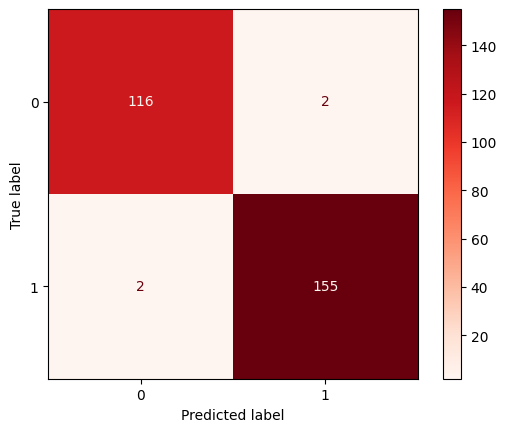

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming 'prediction' from previous cells holds the predicted values
y_pred = predictions  # Assign the predictions to y_pred

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Reds")
plt.show()

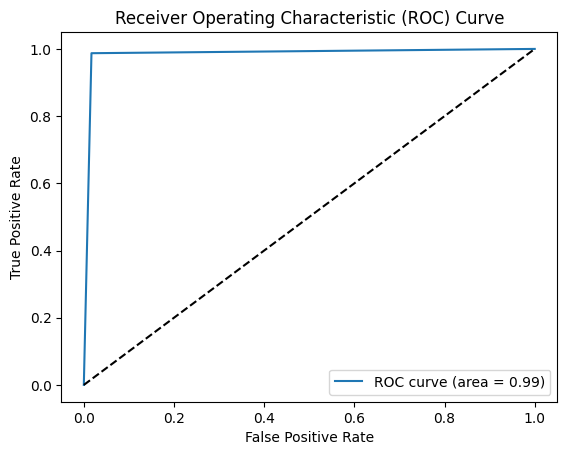

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
#-------------------------------------------------------------------------compute ROC curve and AUC-------------------------------------------------------------------------
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

#-------------------------------------------------------------------------Plot ROC Curve------------------------------------------------------------------------------------------
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
predictions = classifier.predict(X_test)
predictions

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       118
           1       0.93      0.94      0.93       157

    accuracy                           0.92       275
   macro avg       0.92      0.92      0.92       275
weighted avg       0.92      0.92      0.92       275

[[106  12]
 [  9 148]]


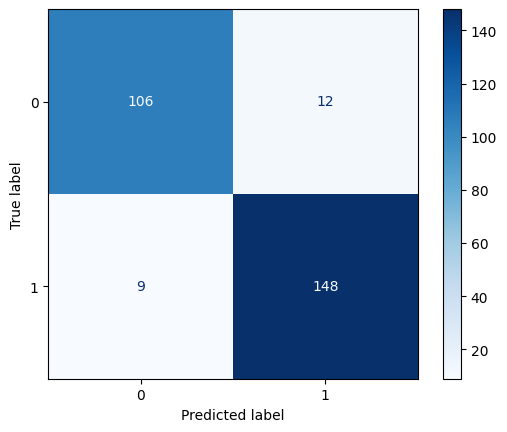

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming 'prediction' from previous cells holds the predicted values
y_pred = predictions  # Assign the predictions to y_pred

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.show()

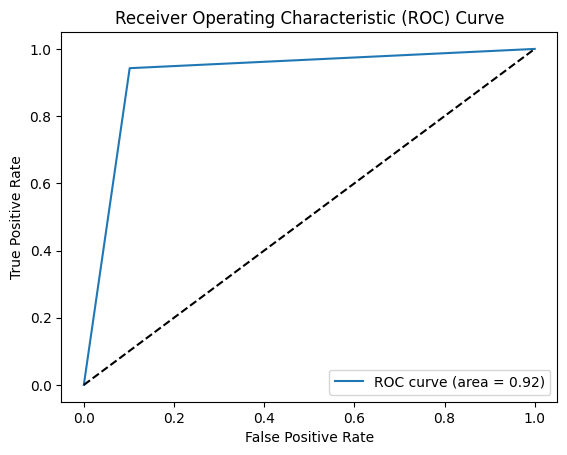

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
#-------------------------------------------------------------------------compute ROC curve and AUC-------------------------------------------------------------------------
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

#-------------------------------------------------------------------------Plot ROC Curve------------------------------------------------------------------------------------------
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
From sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


In [ ]:
predictions = classifier.predict(X_test)
predictions

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       118
           1       0.99      0.99      0.99       157

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

[[116   2]
 [  2 155]]


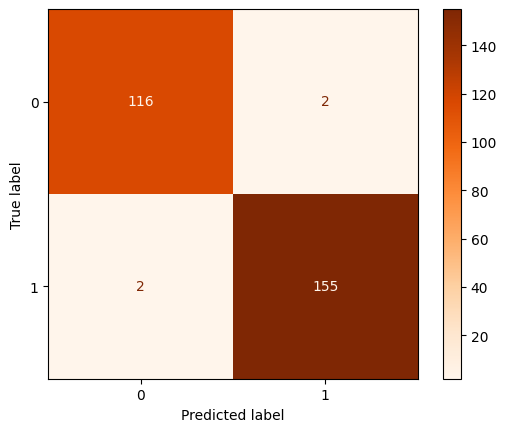

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming 'prediction' from previous cells holds the predicted values
y_pred = predictions  # Assign the predictions to y_pred

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Oranges")
plt.show()

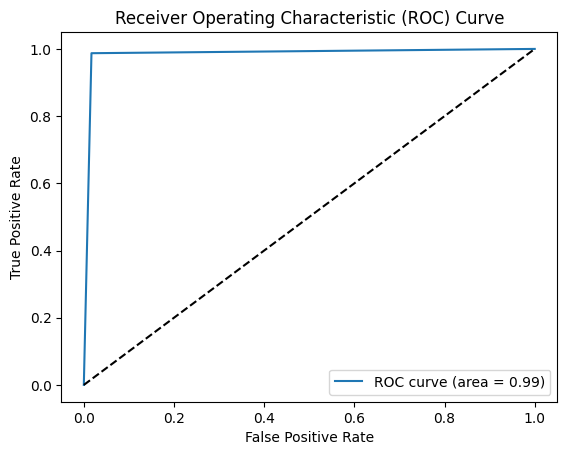

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
#-------------------------------------------------------------------------compute ROC curve and AUC-------------------------------------------------------------------------
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

#-------------------------------------------------------------------------Plot ROC Curve------------------------------------------------------------------------------------------
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

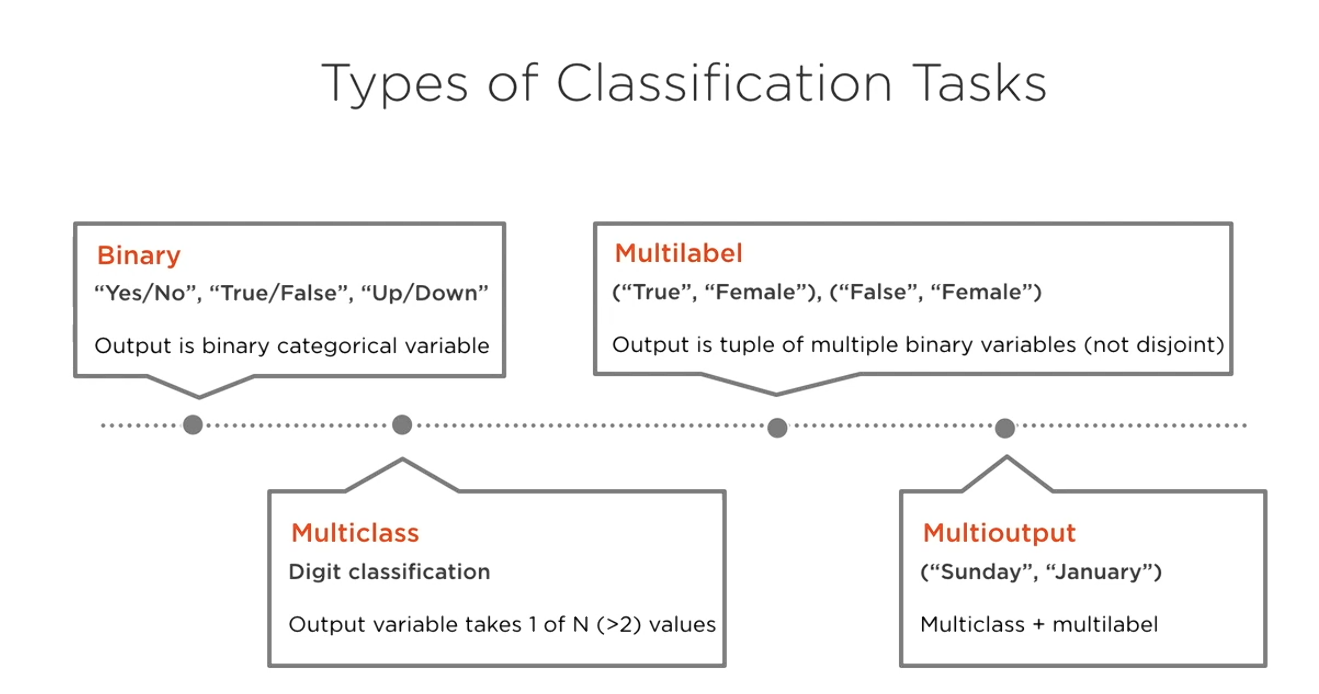

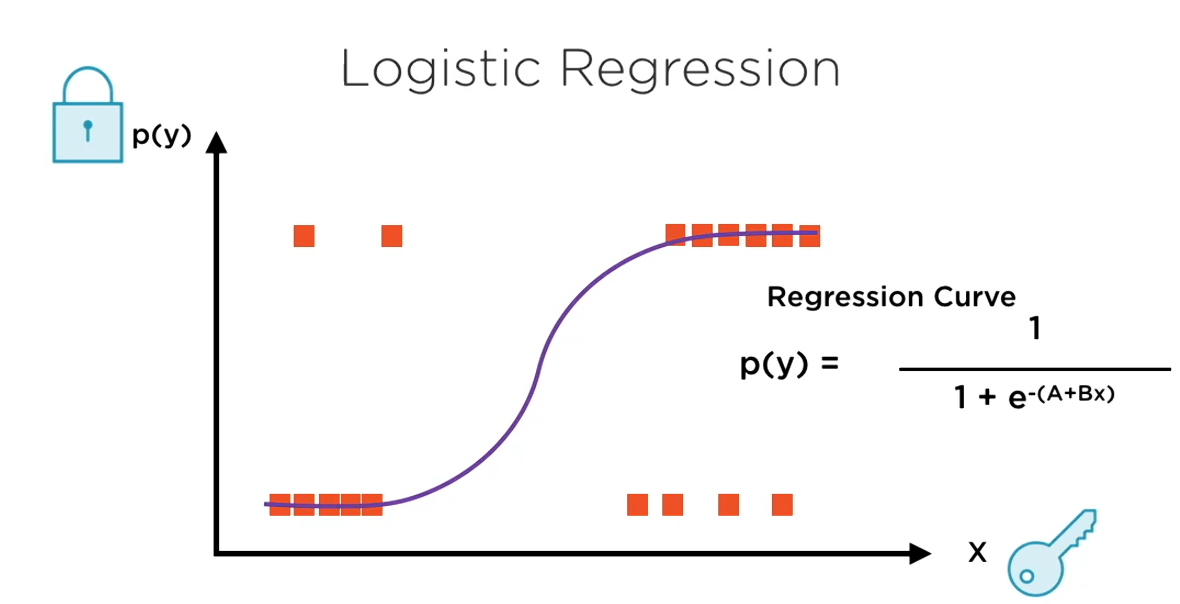

In [ ]:
import pandas as pd
gen = pd.read_csv("/content/sample_data/gender_voice_dataset.csv")

In [ ]:
gen.sample(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1359,0.200940,0.059098,0.225181,0.138735,0.252169,0.113434,1.514458,4.819319,0.886085,0.260091,...,0.200940,0.116426,0.047856,0.256684,0.990999,0.140625,5.296875,5.156250,0.062879,male
720,0.155587,0.060045,0.161151,0.101167,0.206811,0.105643,2.458806,9.940006,0.905334,0.429374,...,0.155587,0.100835,0.040816,0.227273,0.373651,0.102539,0.839844,0.737305,0.469205,male
1219,0.196255,0.062765,0.206083,0.136585,0.256298,0.119713,1.876377,5.797217,0.866953,0.273607,...,0.196255,0.123262,0.047059,0.252632,1.110407,0.023438,7.289062,7.265625,0.068248,male
1064,0.197073,0.057609,0.217386,0.138016,0.243843,0.105827,1.742157,7.871708,0.911062,0.322959,...,0.197073,0.138659,0.047525,0.277457,1.199707,0.023438,8.015625,7.992188,0.099707,male
2310,0.232794,0.038225,0.243396,0.205365,0.265263,0.059898,1.924879,6.347851,0.844692,0.154248,...,0.232794,0.185199,0.051118,0.277457,1.178961,0.023438,11.015625,10.992188,0.084632,female
1948,0.198039,0.030396,0.198105,0.183464,0.212974,0.029510,2.118279,7.139244,0.857263,0.177914,...,0.198039,0.188897,0.025932,0.242424,0.508878,0.109375,1.507812,1.398438,0.324904,female
136,0.115866,0.081730,0.099496,0.040790,0.187556,0.146767,1.885671,8.933406,0.966040,0.759550,...,0.115866,0.103533,0.018692,0.246154,0.136875,0.007812,0.640625,0.632812,0.330982,male
2077,0.152846,0.086618,0.140770,0.089741,0.246787,0.157046,2.703586,18.035469,0.961420,0.740639,...,0.152846,0.164298,0.022567,0.275862,0.541562,0.007812,3.671875,3.664062,0.138806,female
893,0.195201,0.061043,0.215908,0.140200,0.249557,0.109356,1.613701,5.343519,0.894348,0.345574,...,0.195201,0.138504,0.048485,0.279070,0.532580,0.023438,1.804688,1.781250,0.133224,male
2163,0.181308,0.037513,0.184125,0.171595,0.196109,0.024514,3.119178,13.243688,0.844031,0.291376,...,0.181308,0.175215,0.019876,0.238806,0.185998,0.070312,0.242188,0.171875,0.130909,female


In [ ]:
gen.shape

(3168, 21)

In [ ]:
gen.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
gen['label'] = labelEncoder.fit_transform(gen['label'].astype(str))


In [ ]:
gen.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


<Axes: title={'center': 'meanfreq'}, xlabel='label'>

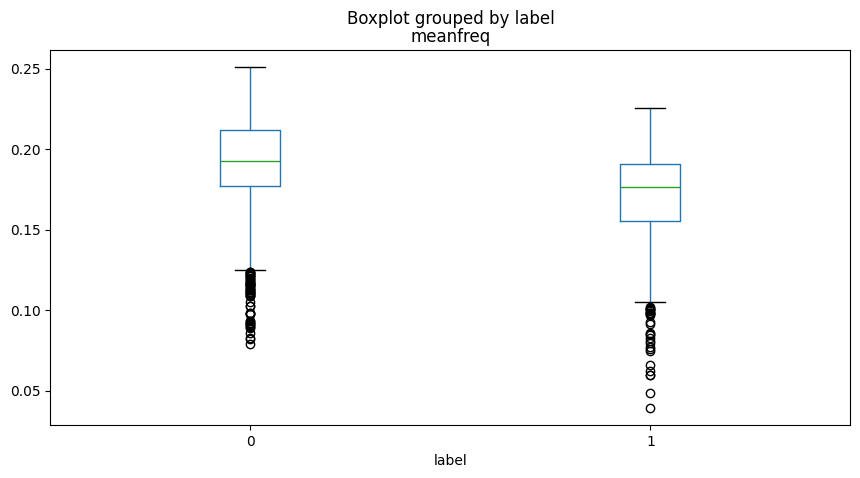

In [ ]:
gen.boxplot(by = 'label', column = ['meanfreq'], grid = False, figsize = (10,5))

In [ ]:
from sklearn.model_selection import train_test_split
X = gen.drop('label', axis=1)
y = gen['label']
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape , y_train.shape

((2534, 20), (2534,))

In [ ]:
X_test.shape , y_test.shape

((634, 20), (634,))

In [ ]:
from sklearn.linear_model import LogisticRegression

# Changed 'penalty' to 'l2' which is a valid option.
logistic_model = LogisticRegression(penalty='l2', solver='liblinear') # used under the hood
logistic_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred = logistic_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}") # this is the number voices accuratly classified as male or female
print(f"Precision: {precision:.2f}") # of all voices These are the possitive identification correctly
print(f"Recall: {recall:.2f}") # off all male voices  how many were  classified correctly  as male

Accuracy: 0.91
Precision: 0.88
Recall: 0.97


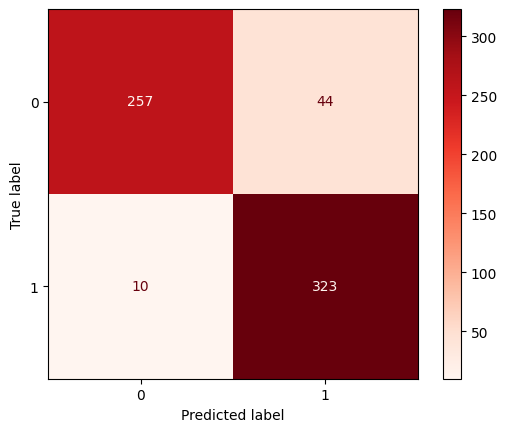

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Instead of assigning the predict method, call it with X_test to get predictions
y_pred = logistic_model.predict(X_test)  # Get the predictions

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Reds")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine (SVM)": SVC(random_state=42, probability=True)
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on test data
    y_pred = model.predict(X_test)
    # Compute metrics
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

results


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': {'Accuracy': 0.9037854889589906,
  'Precision': 0.8715846994535519,
  'Recall': 0.9579579579579579,
  'F1 Score': 0.9127324749642346},
 'Random Forest': {'Accuracy': 0.9810725552050473,
  'Precision': 0.9819819819819819,
  'Recall': 0.9819819819819819,
  'F1 Score': 0.9819819819819819},
 'Support Vector Machine (SVM)': {'Accuracy': 0.6798107255520505,
  'Precision': 0.6666666666666666,
  'Recall': 0.7807807807807807,
  'F1 Score': 0.719225449515906}}

In [ ]:
# Check for missing values and unique values in each column
missing_values = gen.isnull().sum()
unique_values =  gen.nunique()

# Encode the target variable ('label') into binary format
gen['label'] = gen['label'].map({'male': 0, 'female': 1})

# Display missing value summary and updated label encoding
preprocessing_summary = {
    "missing_values": missing_values,
    "unique_values": unique_values,
    "label_encoding_sample": gen['label'].head()
}
preprocessing_summary


{'missing_values': meanfreq       0
 sd             0
 median         0
 Q25            0
 Q75            0
 IQR            0
 skew           0
 kurt           0
 sp.ent         0
 sfm            0
 mode           0
 centroid       0
 meanfun        0
 minfun         0
 maxfun         0
 meandom        0
 mindom         0
 maxdom         0
 dfrange        0
 modindx        0
 label       3168
 dtype: int64,
 'unique_values': meanfreq    3166
 sd          3166
 median      3077
 Q25         3103
 Q75         3034
 IQR         3068
 skew        3166
 kurt        3166
 sp.ent      3166
 sfm         3166
 mode        2825
 centroid    3166
 meanfun     3166
 minfun       913
 maxfun       123
 meandom     2999
 mindom        77
 maxdom      1054
 dfrange     1091
 modindx     3079
 label          0
 dtype: int64,
 'label_encoding_sample': 0   NaN
 1   NaN
 2   NaN
 3   NaN
 4   NaN
 Name: label, dtype: float64}

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = gen.drop(columns=['label'])
y = gen['label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Confirm shapes of the splits
split_shapes = {
    "X_train": X_train.shape,
    "X_test": X_test.shape,
    "y_train": y_train.shape,
    "y_test": y_test.shape
}
split_shapes


{'X_train': (2534, 20),
 'X_test': (634, 20),
 'y_train': (2534,),
 'y_test': (634,)}

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine (SVM)": SVC(random_state=42, probability=True)
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on test data
    y_pred = model.predict(X_test)
    # Compute metrics
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

results


ValueError: Input y contains NaN.

In [ ]:
import pandas as pd

# Before fitting the model, drop rows with NaN in y_train
# and corresponding rows in X_train

# Create a boolean mask indicating rows with non-missing values in y_train
mask = y_train.notna()

# Use the mask to select rows from both X_train and y_train
X_train = X_train[mask]
y_train = y_train[mask].astype(int) # Convert to int after removing NaN

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd # Import pandas to handle NaN values

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine (SVM)": SVC(random_state=42, probability=True)
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    # Before fitting, drop rows with NaN in y_train and corresponding rows in X_train
    mask = y_train.notna() # Create a boolean mask indicating rows with non-missing values in y_train
    X_train_clean = X_train[mask] # Use the mask to select rows from X_train
    y_train_clean = y_train[mask].astype(int) # Use the mask to select rows from y_train and convert to int

    # Train the model using the cleaned data
    model.fit(X_train_clean, y_train_clean)

    # Predict on test data
    y_pred = model.predict(X_test)
    # Compute metrics
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

results

ValueError: Found array with 0 sample(s) (shape=(0, 20)) while a minimum of 1 is required by LogisticRegression.

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Assuming 'gen' is your original DataFrame

# Separate features (X) and target (y)
X = gen.drop(columns=['label'])
y = gen['label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Before fitting the model, handle NaN values in y_train
# If y_train contains any NaN values, either drop those rows or impute them.
# Here, we'll drop rows with NaN in y_train and corresponding rows in X_train.
# but first we will check if there are any NaN values to begin with
if y_train.isnull().any():
    # Create a boolean mask indicating rows with non-missing values in y_train
    mask = y_train.notna()
    # Use the mask to select rows from both X_train and y_train
    X_train = X_train[mask]
    y_train = y_train[mask].astype(int) # Convert to int after removing NaN
else:
    # if there are no nan values, simply convert to int
    y_train = y_train.astype(int)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine (SVM)": SVC(random_state=42, probability=True)
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on test data
    y_pred = model.predict(X_test)
    # Compute metrics
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

results

ValueError: Found array with 0 sample(s) (shape=(0, 20)) while a minimum of 1 is required by LogisticRegression.

##Support Vector Machine

In [ ]:
import pandas as pd

In [ ]:
datatt = pd.read_csv("/content/sample_data/german_credit_data_dataset.csv")

In [ ]:
datatt

,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,installment_rate,personal,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,customer_type
0,A11,6,A34,A43,1169.0,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2.0,A173,1,A192,A201,1
1,A12,48,A32,A43,5951.0,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1.0,A173,1,A191,A201,2
2,A14,12,A34,A46,2096.0,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1.0,A172,2,A191,A201,1
3,A11,42,A32,A42,7882.0,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1.0,A173,2,A191,A201,1
4,A11,24,A33,A40,4870.0,A61,A73,3.0,A93,A101,...,A124,53.0,A143,A153,2.0,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736.0,A61,A74,3.0,A92,A101,...,A121,31.0,A143,A152,1.0,A172,1,A191,A201,1
996,A11,30,A32,A41,3857.0,A61,A73,4.0,A91,A101,...,A122,40.0,A143,A152,1.0,A174,1,A192,A201,1
997,A14,12,A32,A43,804.0,A61,A75,4.0,A93,A101,...,A123,38.0,A143,A152,1.0,A173,1,A191,A201,1
998,A11,45,A32,A43,1845.0,A61,A73,4.0,A93,A101,...,A124,23.0,A143,A153,1.0,A173,1,A192,A201,2


In [ ]:
datatt.shape

(1000, 21)

In [ ]:
datatt.columns

Index(['checking_account_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings', 'present_employment', 'installment_rate',
       'personal', 'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'existing_credits', 'job',
       'dependents', 'telephone', 'foreign_worker', 'customer_type'],
      dtype='object')

In [ ]:
datatt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   checking_account_status  1000 non-null   object 
 1   duration                 1000 non-null   int64  
 2   credit_history           1000 non-null   object 
 3   purpose                  1000 non-null   object 
 4   credit_amount            1000 non-null   float64
 5   savings                  1000 non-null   object 
 6   present_employment       1000 non-null   object 
 7   installment_rate         1000 non-null   float64
 8   personal                 1000 non-null   object 
 9   other_debtors            1000 non-null   object 
 10  present_residence        1000 non-null   float64
 11  property                 1000 non-null   object 
 12  age                      1000 non-null   float64
 13  other_installment_plans  1000 non-null   object 
 14  housing                  

In [ ]:
datatt.index

RangeIndex(start=0, stop=1000, step=1)

In [ ]:
datatt.describe()

,duration,credit_amount,installment_rate,present_residence,age,existing_credits,dependents,customer_type
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [ ]:
!pip install seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert the dictionary 'data' into a Pandas DataFrame
datatt = pd.DataFrame(datatt)  # Assuming 'data' is your dictionary

# Select only numeric columns for correlation calculation
numeric_data = datatt.select_dtypes(include=['number'])

# Now you can calculate the correlation matrix
correlation = numeric_data.corr()
correlation

,duration,credit_amount,installment_rate,present_residence,age,existing_credits,dependents,customer_type
duration,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.214927
credit_amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.154739
installment_rate,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,0.072404
present_residence,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,0.002967
age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.091127
existing_credits,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.045732
dependents,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.003015
customer_type,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,1.000000


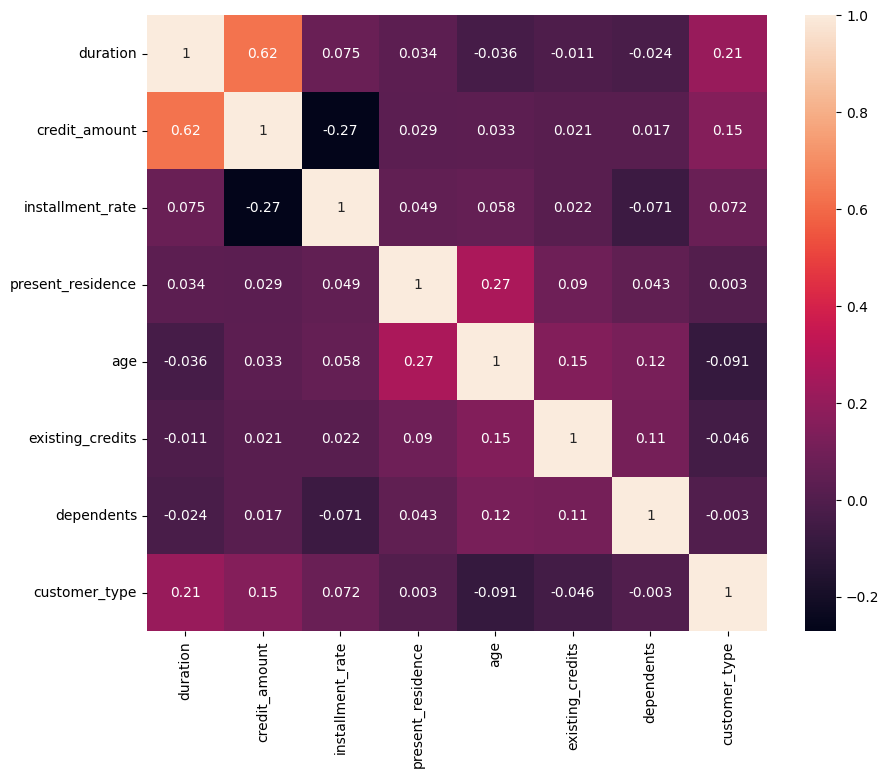

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(10, 8))
sns.heatmap(correlation, annot=True)
plt.show()

In [ ]:
# Get the list of columns in the DataFrame
columns_in_datatt = datatt.columns.tolist()

# Check if the columns to be dropped are present in the DataFrame
columns_to_drop = ['telephone', 'personal', 'present_residence', 'other_installment_plans']
missing_columns = [col for col in columns_to_drop if col not in columns_in_datatt]

# If any columns are missing, print a warning and skip dropping them
if missing_columns:
    print(f"Warning: The following columns are not found in the DataFrame and will be skipped: {missing_columns}")
    columns_to_drop = [col for col in columns_to_drop if col in columns_in_datatt]  # Update columns_to_drop

# Drop the remaining columns
if columns_to_drop:  # Check if columns_to_drop is not empty after removing missing columns
    datatt = datatt.drop(columns_to_drop, axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

savings_dict = {"A65" : 0, "A61" : 1, "A62" : 2, "A63" : 3, "A64" : 4}
datatt['savings'].replace(savings_dict, inplace=True)
datatt.head()

<ipython-input-49-50833de982b8>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datatt['savings'].replace(savings_dict, inplace=True)
<ipython-input-49-50833de982b8>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datatt['savings'].replace(savings_dict, inplace=True)


,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,installment_rate,other_debtors,property,age,housing,existing_credits,job,dependents,foreign_worker,customer_type
0,A11,6,A34,A43,1169.0,0,A75,4.0,A101,A121,67.0,A152,2.0,A173,1,A201,1
1,A12,48,A32,A43,5951.0,1,A73,2.0,A101,A121,22.0,A152,1.0,A173,1,A201,2
2,A14,12,A34,A46,2096.0,1,A74,2.0,A101,A121,49.0,A152,1.0,A172,2,A201,1
3,A11,42,A32,A42,7882.0,1,A74,2.0,A103,A122,45.0,A153,1.0,A173,2,A201,1
4,A11,24,A33,A40,4870.0,1,A73,3.0,A101,A124,53.0,A153,2.0,A173,2,A201,2


In [ ]:
datatt.shape

(1000, 17)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
def naive_bayes(X_train, y_train, X_test):
    classifier = GaussianNB() # uses naive bayse for classification
    classifier.fit(X_train, y_train)

    return classifier

In [ ]:
def k_nearest_neighbors(X_train, y_train, X_test):
    classifier = KNeighborsClassifier(n_neighbors=10)
    classifier.fit(X_train, y_train)

    return classifier

In [ ]:
def svc(X_train, y_train, X_test):
    classifier = SVC(kernel='rbf', gamma='scale')
    classifier.fit(X_train, y_train)

    return classifier

In [ ]:
def decision_tree(X_train, y_train, X_test):
    classifier = DecisionTreeClassifier(max_depth=6)
    classifier.fit(X_train, y_train)

    return classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
def build_and_train_classifier(x_train, y_train, classfication_fn):

    model = classfication_fn(x_train, y_train)
    y_pred = model.predict(X_test)

    train_score = model.score(X_train, y_train)
    test_score = accuracy_score(y_test, y_pred)

    print("Training Score:", train_score)
    print("Testing Score:", test_score)
    accuracy = accuracy_score(y_test, y_pred)

#Decision Tree Classifier

In [ ]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd

data = pd.read_csv("/content/sample_data/winequality-white.csv")
# Example dataset (replace with your dataset if needed)
# Here, I will use the wine dataset from sklearn for demonstration purposes.

# Extract features (X) and target (y) from the DataFrame
X = data.drop('quality', axis=1)  # Assuming 'quality' is the target variable
y = data['quality']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to build and train a classifier
def build_and_train_classifier(x_train, y_train, x_test, y_test, classification_fn):
    """
    Train and evaluate a classification model.
    Arguments:
    - x_train: Training features
    - y_train: Training labels
    - x_test: Testing features
    - y_test: Testing labels
    - classification_fn: A classification model (e.g., Decision Tree, Naive Bayes)

    Returns:
    - None (prints the training and testing accuracy)
    """
    # Initialize the model (classification_fn should be a class like DecisionTreeClassifier or GaussianNB)
    model = classification_fn()

    # Train the model on training data
    model.fit(x_train, y_train)

    # Predict on training and test data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate accuracy
    train_score = accuracy_score(y_train, y_train_pred)
    test_score = accuracy_score(y_test, y_test_pred)

    # Print results
    print(f"Training Accuracy: {train_score:.4f}")
    print(f"Testing Accuracy: {test_score:.4f}")


# Train and evaluate with Decision Tree
print("Decision Tree Classifier:")
build_and_train_classifier(X_train, y_train, X_test, y_test, DecisionTreeClassifier)

# Train and evaluate with Gaussian Naive Bayes
print("\nGaussian Naive Bayes:")
build_and_train_classifier(X_train, y_train, X_test, y_test, GaussianNB)


print("\nNaive_bayes:")
build_and_train_classifier(X_train, y_train, X_test, y_test, GaussianNB)

Decision Tree Classifier:
Training Accuracy: 1.0000
Testing Accuracy: 0.6102

Gaussian Naive Bayes:
Training Accuracy: 0.4492
Testing Accuracy: 0.4388

Naive_bayes:
Training Accuracy: 0.4492
Testing Accuracy: 0.4388


In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'max_depth': [2, 3, 4, 5, 6],  # Example values, adjust as needed
}

# Create a GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)
#Make sure X_train and y_train are defined earlier in your script

# Now you can access the best parameters
dt_model = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'], random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import numpy as np
# Models
dt_model = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'], random_state=42)
nb_model = GaussianNB()

# Cross-validation scores
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
nb_cv_scores = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='accuracy')

# Report
print(f"Decision Tree CV Accuracy: {np.mean(dt_cv_scores):.4f} ± {np.std(dt_cv_scores):.4f}")
print(f"Naive Bayes CV Accuracy: {np.mean(nb_cv_scores):.4f} ± {np.std(nb_cv_scores):.4f}")

# Test performance
dt_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
print(f"Decision Tree Test Accuracy: {dt_model.score(X_test, y_test):.4f}")
print(f"Naive Bayes Test Accuracy: {nb_model.score(X_test, y_test):.4f}")


Decision Tree CV Accuracy: 0.5342 ± 0.0084
Naive Bayes CV Accuracy: 0.4421 ± 0.0194
Decision Tree Test Accuracy: 0.5163
Naive Bayes Test Accuracy: 0.4388


Decision Tree Classifier:
Training Accuracy: 1.0000
Testing Accuracy: 0.6051

Gaussian Naive Bayes:
Training Accuracy: 0.4492
Testing Accuracy: 0.4388


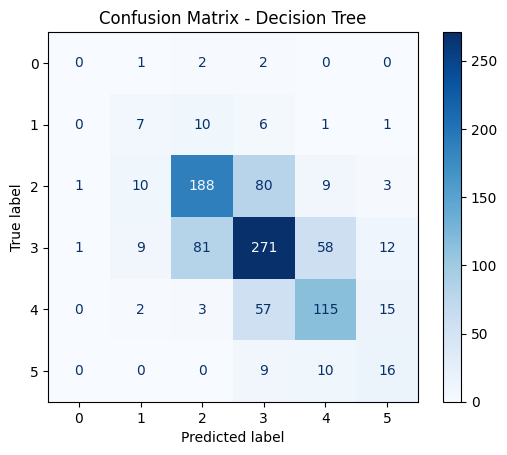

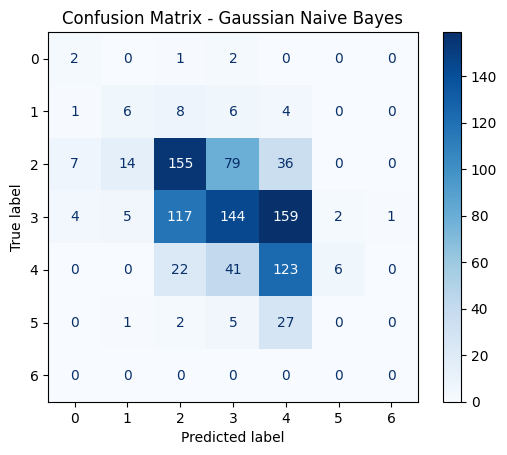

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Make sure to import
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# ... (your existing code for data loading, preprocessing, etc.)

# Initialize the models
decision_tree = DecisionTreeClassifier() # Create an instance of DecisionTreeClassifier
gaussian_nb = GaussianNB() # Create an instance of GaussianNB

# Train and evaluate with Decision Tree
print("Decision Tree Classifier:")
# Call fit on the decision_tree instance
decision_tree.fit(X_train, y_train)
build_and_train_classifier(X_train, y_train, X_test, y_test, DecisionTreeClassifier) # This is still used for reporting metrics

# Train and evaluate with Gaussian Naive Bayes
print("\nGaussian Naive Bayes:")
# Call fit on the gaussian_nb instance
gaussian_nb.fit(X_train, y_train)
build_and_train_classifier(X_train, y_train, X_test, y_test, GaussianNB) # This is still used for reporting metrics


# ... (rest of your code)

# In your confusion matrix code:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example for Decision Tree
y_pred_dt = decision_tree.predict(X_test) # Now 'decision_tree' is an instance and fitted
cm_dt = confusion_matrix(y_test, y_pred_dt)

ConfusionMatrixDisplay(cm_dt).plot(cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Repeat the process for Gaussian Naive Bayes
y_pred_gnb = gaussian_nb.predict(X_test) # Now 'gaussian_nb' is an instance and fitted
cm_gnb = confusion_matrix(y_test, y_pred_gnb)

ConfusionMatrixDisplay(cm_gnb).plot(cmap='Blues')
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.show()

In [ ]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_wine
import pandas as pd

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Function to build and train a classifier
def build_and_train_classifier(x_train, y_train, x_test, y_test, classification_fn):
# Initialize the model (classification_fn should be a class like DecisionTreeClassifier or GaussianNB)
    model = classification_fn()

    # Train the model on training data
    model.fit(x_train, y_train)

    # Predict on training and test data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate accuracy
    train_score = accuracy_score(y_train, y_train_pred)
    test_score = accuracy_score(y_test, y_test_pred)

    # Print results
    print(f"Training Accuracy: {train_score:.4f}")
    print(f"Testing Accuracy: {test_score:.4f}")

In [ ]:
# Train and evaluate with Decision Tree
print("Decision Tree Classifier:")
build_and_train_classifier(X_train, y_train, X_test, y_test, DecisionTreeClassifier)

# Train and evaluate with Gaussian Naive Bayes
print("\nGaussian Naive Bayes:")
build_and_train_classifier(X_train, y_train, X_test, y_test, GaussianNB)



In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Assuming you are using pandas for your DataFrame


# Function to build and train a classifier
def build_and_train_classifier(x_train, y_train, x_test, y_test, classification_fn):
    """
    Builds and trains a classifier.

    Args:
        x_train: Training data features.
        y_train: Training data labels.
        x_test: Testing data features.
        y_test: Testing data labels.
        classification_fn: The classifier class to use (e.g., DecisionTreeClassifier, GaussianNB).

    Returns:
        model: The trained classifier model.
    """
    # Initialize the model (classification_fn should be a class like DecisionTreeClassifier or GaussianNB)
    model = classification_fn()

    # Train the model on training data
    model.fit(x_train, y_train)

    # Predict on training and test data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate accuracy
    train_score = accuracy_score(y_train, y_train_pred)
    test_score = accuracy_score(y_test, y_test_pred)

    # Print results
    print(f"Training Accuracy: {train_score:.4f}")
    print(f"Testing Accuracy: {test_score:.4f}")

    return model # Return the trained model


# Assuming X and y are your original data
# Split the data into training and test sets ensuring consistent feature names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate with Decision Tree, and store the trained model
print("Decision Tree Classifier:")
decision_tree = build_and_train_classifier(X_train, y_train, X_test, y_test, DecisionTreeClassifier)

# Train and evaluate with Gaussian Naive Bayes, and store the trained model
print("\nGaussian Naive Bayes:")
gaussian_nb = build_and_train_classifier(X_train, y_train, X_test, y_test, GaussianNB)


# ... (Rest of your code for plotting accuracy and confusion matrix) ...

# In your confusion matrix plotting section:
# Example for Decision Tree - Use the stored decision_tree model
y_pred_dt = decision_tree.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)

# ... (Rest of your confusion matrix plotting code) ...

Decision Tree Classifier:
Training Accuracy: 1.0000
Testing Accuracy: 0.6041

Gaussian Naive Bayes:
Training Accuracy: 0.4492
Testing Accuracy: 0.4388


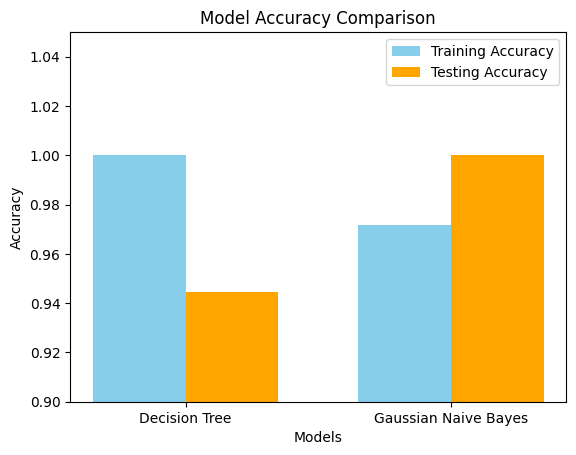

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy values
models = ['Decision Tree', 'Gaussian Naive Bayes']
train_accuracies = [1.0000, 0.9718]
test_accuracies = [0.9444, 1.0000]

# Bar Chart
x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, train_accuracies, width, label='Training Accuracy', color='skyblue')
plt.bar(x + width/2, test_accuracies, width, label='Testing Accuracy', color='orange')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(x, models)
plt.ylim(0.9, 1.05)
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Updated parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', None]  # Add class balancing
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, error_score='raise')
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Decision Tree ROC
y_score_dt = decision_tree.predict_proba(X_test)[:, 1]
# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# Assuming you want ROC for class 1, change if needed
fpr_dt, tpr_dt, _ = roc_curve(y_test_bin[:, 0], y_score_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# Gaussian Naive Bayes ROC
y_score_gnb = gaussian_nb.predict_proba(X_test)[:, 1]
# Binarize the labels for multiclass ROC
# Assuming you want ROC for class 1, change if needed
fpr_gnb, tpr_gnb, _ = roc_curve(y_test_bin[:, 0], y_score_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)
plt.plot(fpr_gnb, tpr_gnb, label=f'Gaussian Naive Bayes (AUC = {roc_auc_gnb:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer # Import SimpleImputer

# ... (your existing code to load and prepare data) ...

# Create an imputer to replace NaN with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Impute missing values in X_train and X_test
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

print("Model: Naive Bayes")
build_and_train_classifier(X_train, y_train, X_test, y_test, GaussianNB)
# ... (rest of your code) ...

In [ ]:
# Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv("/content/sample_data/winequality-white.csv")
# Load dataset (assuming 'wine_data' is the dataframe with wine data)
X = data.drop(columns=['quality'])  # Features (drop target 'quality')
y = data['quality']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


In [ ]:
import matplotlib.pyplot as plt

# Plot Predicted vs Actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted vs Actual Values')
plt.show()


In [ ]:
# Plot Residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Quality')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer


In [ ]:
print("Model: Naive Bayes")
build_and_train_classifier(X_train, y_train, X_test, y_test, GaussianNB)


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Train the Naive Bayes Model
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
# Load the dataset
data = pd.read_csv('/content/sample_data/winequality-white.csv')

# Print the columns of the DataFrame to check for 'quality' column
print(data.columns)

# If 'quality' is not present, check for similar names and correct it in the following line
# For example, if the column is named 'Quality', change 'quality' to 'Quality'
X = data.drop('quality', axis=1)
y = data['quality']

# Convert 'quality' into a binary or multi-class classification problem
y = y.apply(lambda x: 1 if x >= 6 else 0)  # Good quality (6+) vs Poor (<6)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize confusion matrix
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Load dataset
data = pd.read_csv("/content/sample_data/winequality-white.csv")

# Features and target
X = data.drop('quality', axis=1)
y = data['quality']

# Binarize target labels for multiclass ROC if needed
y_binarized = label_binarize(y, classes=sorted(y.unique()))
n_classes = y_binarized.shape[1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
rf_classifier = RandomForestClassifier(random_state=42)
svc_classifier = SVC(probability=True, random_state=42)

# One-vs-Rest (OvR) using Random Forest
print("One-vs-Rest (OvR) with Random Forest:")
ovr_rf = OneVsRestClassifier(rf_classifier)
ovr_rf.fit(X_train, y_train)
ovr_rf_pred = ovr_rf.predict(X_test)
ovr_rf_accuracy = accuracy_score(y_test, ovr_rf_pred)
ovr_rf_f1 = f1_score(y_test, ovr_rf_pred, average='weighted')
print(f"Accuracy: {ovr_rf_accuracy:.4f}")
print(f"F1 Score: {ovr_rf_f1:.4f}")
print("Classification Report (OvR - RF):")
print(classification_report(y_test, ovr_rf_pred))

# One-vs-One (OvO) using SVC
print("\nOne-vs-One (OvO) with SVC:")
ovo_svc = OneVsOneClassifier(svc_classifier)
ovo_svc.fit(X_train, y_train)
ovo_svc_pred = ovo_svc.predict(X_test)
ovo_svc_accuracy = accuracy_score(y_test, ovo_svc_pred)
ovo_svc_f1 = f1_score(y_test, ovo_svc_pred, average='weighted')
print(f"Accuracy: {ovo_svc_accuracy:.4f}")
print(f"F1 Score: {ovo_svc_f1:.4f}")
print("Classification Report (OvO - SVC):")
print(classification_report(y_test, ovo_svc_pred))

# Comparison
print("\nPerformance Comparison:")
print(f"OvR (Random Forest) - Accuracy: {ovr_rf_accuracy:.4f}, F1 Score: {ovr_rf_f1:.4f}")
print(f"OvO (SVC) - Accuracy: {ovo_svc_accuracy:.4f}, F1 Score: {ovo_svc_f1:.4f}")


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("/content/sample_data/winequality-white.csv")

# Features and target
X = data.drop('quality', axis=1)
y = data['quality']



# Hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]  # To handle class imbalance
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Best hyperparameters and model
print(f"Best Hyperparameters for Random Forest: {grid_search_rf.best_params_}")

# Predict on test data
rf_pred = grid_search_rf.best_estimator_.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred):.4f}")

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced', None]
}

# Initialize SVM classifier
svm = SVC(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Best hyperparameters and model
print(f"Best Hyperparameters for SVM: {grid_search_svm.best_params_}")

# Predict on test data
svm_pred = grid_search_svm.best_estimator_.predict(X_test)

# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))
print(f"SVM Accuracy: {accuracy_score(y_test, svm_pred):.4f}")

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Performance comparison plot
models = ['Random Forest', 'SVM']
accuracies = [accuracy_score(y_test, rf_pred), accuracy_score(y_test, svm_pred)]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Model Comparison: Random Forest vs SVM')
plt.ylabel('Accuracy')
plt.show()

# Compare Classification Reports
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Grid Search
rf_model = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

# Evaluate the model with best parameters
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy: ", scores.mean())


In [ ]:
param_grid = {
    'max_features': ['sqrt', 'log2', None]  # Replace 'auto' with 'sqrt' or 'log2'
}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced')
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Updated parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', None]  # Add class balancing
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, error_score='raise')
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['linear', 'rbf', 'poly']
}

# Grid Search
svm_model = SVC()
grid_search = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)
print("Best parameters for SVM:", grid_search.best_params_)

# Evaluate the model with best parameters
best_svm_model = grid_search.best_estimator_
best_svm_model.fit(X_train, y_train)
y_pred_svm = best_svm_model.predict(X_test)
print(classification_report(y_test, y_pred_svm))


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model on scaled data
best_svm_model.fit(X_train_scaled, y_train)


In [ ]:
svm_scores = cross_val_score(best_svm_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("SVM Cross-Validation Accuracy: ", svm_scores.mean())


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Random Forest Evaluation
rf_y_pred = best_rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

# SVM Evaluation
svm_y_pred = best_svm_model.predict(X_test_scaled)
print("SVM Classification Report:")
print(classification_report(y_test, svm_y_pred))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, svm_y_pred)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()
